# Základná štatistika

In [1]:
import pandas as pd
# Načítanie datasetu a základný prieskum
df = pd.read_csv(r"C:\Users\admin\anaconda\envs\new_env\data_full1.csv")
dataset_info = df.info()
numerical_stats = df.describe(include=[float, int])
categorical_stats = df.describe(include=[object])
missing_values = df.isna().sum()
unique_values = df.nunique()
dataset_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Unique Values": unique_values,
})
print(dataset_summary, numerical_stats, categorical_stats)
missing_values_minus_one = (df == -1).sum()
missing_values_minus_one = missing_values_minus_one[missing_values_minus_one > 0]
missing_values_minus_one.sort_values(ascending=False, inplace=True)
print(missing_values_minus_one.sum())
num_attributes = df.shape[1]
print(num_attributes)
# Chi-kvadrát test nezávislosti
from scipy.stats import chi2_contingency
target_col = 'Synkopa'
test_cols = ['O2', 'O3', 'O4', 'O5', 'O1', 'F9', 'F6', 'F1', 'F2', 'F3','F4', 'F5', 'F8', 'F7', 'F10', 'K4', 'K3', 'K2', 'K1', 'A9', 'A10']
results = []

for col in test_cols:
    contingency_table = pd.crosstab(df[col], df[target_col])

    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        results.append({'Atribút': col, 'p-hodnota': p, 'Chi2': chi2})
    else:
        results.append({'Atribút': col, 'p-hodnota': None, 'Chi2': None})

chi_results_df = pd.DataFrame(results).sort_values('p-hodnota')

print(chi_results_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Columns: 161 entries, Číslo dotazníka to S
dtypes: float64(4), int64(144), object(13)
memory usage: 466.8+ KB
                 Missing Values  Unique Values
Číslo dotazníka               0            247
Dátum                         0            207
Datum narodenia               0            310
Pohlavie                      0              2
Vek                           0             66
...                         ...            ...
R                             0              1
R1                            0              2
R2                            0              2
R3                            0              1
S                             0            181

[161 rows x 2 columns]        Číslo dotazníka         Vek     Synkopa           A          A1  \
count       371.000000  371.000000  371.000000  371.000000  371.000000   
mean        147.442049   47.595687    0.555256    0.935310    0.964960   
std     

In [2]:
missing_minus_1_count = (df == -1).sum().sum()
print(f"Súčet všetkých hodnôt -1: {missing_minus_1_count}")

Súčet všetkých hodnôt -1: 10455


In [3]:
# Odstránenie stĺpcov, ktoré nebudú použité pri modelovaní(po Chi-kvadrátu)
df.drop(columns=['A10','A9','O2', 'O3', 'O4', 'O5','F9', 'F6', 'F1', 'F2', 'F3', 'F4', 'F5', 'F8', 'F7', 'F10','K3', 'K2', 'K1', 'Dátum', 'Datum narodenia','S','Číslo dotazníka','A','B','C','D','E','F','G','H','I','J','K','N','O','P','Q','R'], inplace=True)
missing_minus_1_count = (df == -1).sum().sum()
print(f"Súčet všetkých hodnôt -1: {missing_minus_1_count}")
df.to_csv(r"C:\Users\admin\anaconda\envs\new_env\data_full.csv", index=False)

Súčet všetkých hodnôt -1: 6579


### Distribúcia cieľovej premennej: `Synkopa`

In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\admin\anaconda\envs\new_env\data_full.csv")
syncope_counts = df["Synkopa"].value_counts()

total_samples = len(df)
positive_samples = syncope_counts.get(1, 0)
negative_samples = syncope_counts.get(0, 0)
syncope_ratio = positive_samples / total_samples if total_samples > 0 else 0

print(f"Celkový počet záznamov: {total_samples}")
print(f"Pozitívnych (Synkopa=1): {positive_samples}")
print(f"Negatívnych (Synkopa=0): {negative_samples}")
print(f"Pomer Synkopa=1 / Celkovo: {syncope_ratio:.2%}")

Celkový počet záznamov: 371
Pozitívnych (Synkopa=1): 206
Negatívnych (Synkopa=0): 165
Pomer Synkopa=1 / Celkovo: 55.53%


### Graf rozdelenie pacientov podľa pohlavia

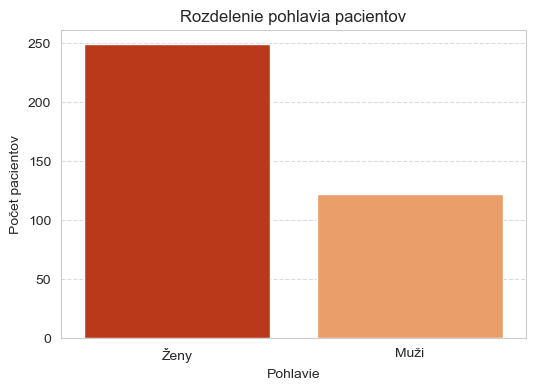

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    "Pohlavie": ["Ženy", "Muži"],
    "Počet": [249, 122]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=data, x="Pohlavie", y="Počet", hue="Pohlavie", palette=["#D62900", "#FF9B56"], dodge=False)
plt.xlabel("Pohlavie")
plt.ylabel("Počet pacientov")
plt.title("Rozdelenie pohlavia pacientov")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Graf rozdelenie synkopy medzi pacientmi

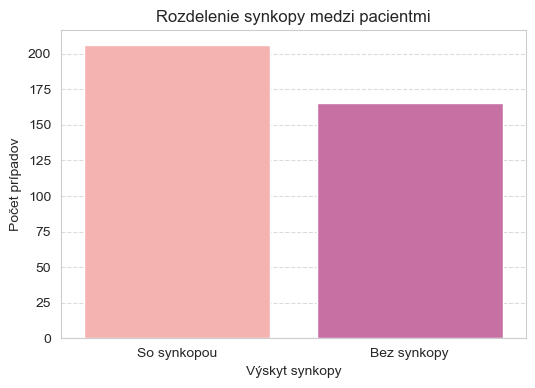

In [6]:
data = pd.DataFrame({
    "Synkopa": ["So synkopou", "Bez synkopy"],
    "Počet": [206, 165]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=data, x="Synkopa", y="Počet", hue="Synkopa", palette=["#FFA9A5", "#D462A6"], dodge=False)
plt.xlabel("Výskyt synkopy")
plt.ylabel("Počet prípadov")
plt.title("Rozdelenie synkopy medzi pacientmi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Graf rozdelenie typov synkopy

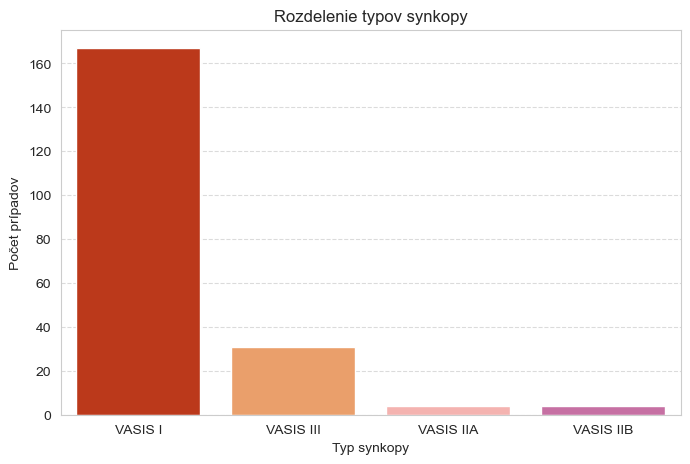

In [7]:
typ_synkopy_counts = df["Typ Synkopy"].value_counts()

valid_types = ["VASIS I", "VASIS IIA", "VASIS IIB", "VASIS III"]
filtered_typ_synkopy_counts = typ_synkopy_counts[typ_synkopy_counts.index.isin(valid_types)]

data = pd.DataFrame({
    "Typ": filtered_typ_synkopy_counts.index,
    "Počet": filtered_typ_synkopy_counts.values
})

plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="Typ", y="Počet", hue="Typ", palette=["#D62900", "#FF9B56", "#FFA9A5", "#D462A6"], dodge=False)
plt.xlabel("Typ synkopy")
plt.ylabel("Počet prípadov")
plt.title("Rozdelenie typov synkopy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Graf vekového rozdelenia pacientov

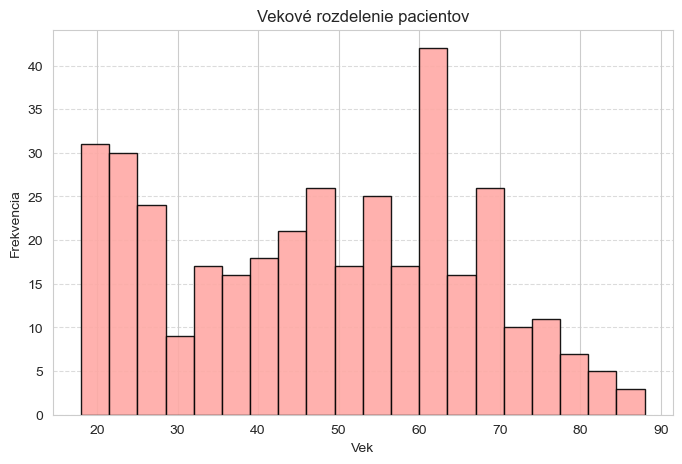

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df["Vek"], bins=20, edgecolor='black', alpha=0.9, color="#FFA9A5")
plt.xlabel("Vek")
plt.ylabel("Frekvencia")
plt.title("Vekové rozdelenie pacientov")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
pohlavie_counts = df["Pohlavie"].value_counts()

synkopa_counts = df["Synkopa"].value_counts()

typ_synkopy_counts = df["Typ Synkopy"].value_counts()

df["Veková skupina"] = pd.cut(df["Vek"], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90], right=False)
vek_counts = df["Veková skupina"].value_counts().sort_index()

print("Počet pacientov podľa pohlavia:")
print(pohlavie_counts)
print("\nPočet pacientov so synkopou a bez nej:")
print(synkopa_counts)
print("\nPočetnosť jednotlivých typov synkopy:")
print(typ_synkopy_counts)
print("\nPočet pacientov podľa vekových skupín:")
print(vek_counts)

Počet pacientov podľa pohlavia:
F    249
M    122
Name: Pohlavie, dtype: int64

Počet pacientov so synkopou a bez nej:
1    206
0    165
Name: Synkopa, dtype: int64

Početnosť jednotlivých typov synkopy:
VASIS I      167
NO CLASS     165
VASIS III     31
VASIS IIA      4
VASIS IIB      4
Name: Typ Synkopy, dtype: int64

Počet pacientov podľa vekových skupín:
[10, 20)    12
[20, 30)    73
[30, 40)    48
[40, 50)    59
[50, 60)    59
[60, 70)    80
[70, 80)    29
[80, 90)    11
Name: Veková skupina, dtype: int64
